<a href="https://colab.research.google.com/github/AjmalSarwary/invest_ml/blob/master/code/Understanding_Optimization_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#```Breaking down Weight Allocation and Optimizaton Algorithms```
In this notebook, I explore Weight Allocation and Optimization Algorithms by emulating the application of Equal Weight (EW) and Cap Weighted (CW) strategies. I'll create synthetic asset datasets, explore the logic behind basic optimization techniques, and test portfolio allocations to get a practical understanding of how these algorithms work in portfoio management.

## ```D. Understanding Weight Allocation Algorithms```


> In sections D.1 through D.6, I create and analyze two synthetic assets with 18 monthly returns to understand the behavior of Equal Weight (EW) and Cap Weighted (CW) portfolios. Through the use of Python, I generate datasets, apply sliding window techniques for portfolio optimization, and calculate allocation ratios to examine their impact on portfolio performance. Finally, I visualize the growth of an equally weighted portfolio to assess its performance over time.



In [1]:
def weight_ew(r):
    """
    Returns the weights of the EW portfolio based on the asset returns "r" as a DataFrame
    """
    n = len(r.columns)
    return pd.Series(1/n, index=r.columns)

def weight_cw(r, cap_weights, **kwargs):
    """
    Returns the weights of the CW portfolio based on the time series of capweights
    """
    return cap_weights.loc[r.index[1]]

... <br>
###```D.1 Synthesize Dataset of Returns```


> Creating dataset of two synthetic assets with 18 monthly returns



In [4]:
# Creating retruns Series
import numpy as np
import pandas as pd
series1 = 0.2*np.random.normal(scale=0.14/(12**.5), size=18)
series2 = 0.3*np.random.normal(scale=0.17/(12**.5), size=18)
# Creating DataFrame out of a dictionary with Series as constituents
abrets = pd.DataFrame({'Returns A':series1, 'Returns B':series2})
# Creating a date range for the index
dates = pd.date_range(start='2022-01', periods=18, freq='M')
# Setting the dates as the index of the DataFrame
abrets.index = dates
# Change the format to monthly
abrets.index = abrets.index.to_period('M')
abrets

,Returns A,Returns B
2022-01,0.002706,0.031122
2022-02,-0.002949,0.006044
2022-03,-0.010064,0.001733
2022-04,-0.005273,0.020572
2022-05,-0.004602,-0.026971
2022-06,0.022147,0.001979
2022-07,-0.006278,0.008785
2022-08,0.002204,0.014583
2022-09,0.006079,-0.011887
2022-10,-0.009924,0.027322


... <br>


> ```Testing function call```



In [5]:
# Testing function call
weight_ew(abrets)

Returns A    0.5
Returns B    0.5
dtype: float64

... <br>
###```D2. Test Index Replication```

In [6]:
# Replicating index into new DataFrame
indexx = abrets.iloc[6-1:].index
print(pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12,13],columns=['nums'] ,index=indexx))
# Control for index replication
rg = range(13)
print(pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12,13],columns=['nums'] ,index=rg))

         nums
2022-06     1
2022-07     2
2022-08     3
2022-09     4
2022-10     5
2022-11     6
2022-12     7
2023-01     8
2023-02     9
2023-03    10
2023-04    11
2023-05    12
2023-06    13
    nums
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13


... <br>
###```D.3 Generate Sliding Windows (Slicers)```


> Later the allocation ratios will be equal for each sliding window, such that no sliding windows are necessary for crafting eq portfolios but I am trying to theoretically make sense of applying sliding slices to extract/calculate/rebalance/assign composition ratios to return series through this 'mock-up' code as a principle heuristic



In [7]:
# Defining size of periods in individual windows
estimation_window = 3
# Retrieve count of periods (data points)
n_periods = abrets.shape[0]
print(n_periods)
# Generating windows for all possible time frames
windows = [(start, start+estimation_window) for start in range((n_periods-estimation_window) +1)]
windows

18


[(0, 3),
 (1, 4),
 (2, 5),
 (3, 6),
 (4, 7),
 (5, 8),
 (6, 9),
 (7, 10),
 (8, 11),
 (9, 12),
 (10, 13),
 (11, 14),
 (12, 15),
 (13, 16),
 (14, 17),
 (15, 18)]

... <br>
###```D.4 Apply my Sliding Windows & Create Allocation Ratios```

> Applying sliding windows to calculate sliding Allocation Ratios for my new equally weighted Portfolio with the constraint<br>

> ```python
weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
```  

> but first testing the sliding slices on the assets' returns dataset



In [8]:
# Testing the sliders on returns
[abrets.iloc[win[0]:win[1]]for win in windows][:2]

[         Returns A  Returns B
 2022-01   0.002706   0.031122
 2022-02  -0.002949   0.006044
 2022-03  -0.010064   0.001733,
          Returns A  Returns B
 2022-02  -0.002949   0.006044
 2022-03  -0.010064   0.001733
 2022-04  -0.005273   0.020572]

In [9]:
# Calculating weight ratios sliced by sliding windows
weights = [weight_ew(abrets.iloc[win[0]:win[1]]) for win in windows]
weights[:2]

[Returns A    0.5
 Returns B    0.5
 dtype: float64,
 Returns A    0.5
 Returns B    0.5
 dtype: float64]

In [10]:
# Crating allocaions' ratios dataframe and reattach original indexing
weizz = pd.DataFrame(weights, index=abrets.iloc[estimation_window-1:].index, columns=abrets.columns)
weizz

,Returns A,Returns B
2022-03,0.5,0.5
2022-04,0.5,0.5
2022-05,0.5,0.5
2022-06,0.5,0.5
2022-07,0.5,0.5
2022-08,0.5,0.5
2022-09,0.5,0.5
2022-10,0.5,0.5
2022-11,0.5,0.5
2022-12,0.5,0.5


... <br>
###```D.5 Craft the naive allocation portfolio```

> Crafting a portfolio from assets A and B with 50:50 ratio by multipying wights into retruns of returns series and performing vector addition on them




---



In [11]:
returns = (weizz * abrets).sum(axis="columns",  min_count=1)
print(returns[:3], '\n')
print((abrets.iloc[:,0]*weizz.iloc[:,0]+abrets.iloc[:,1]*weizz.iloc[:,1])[:3])

2022-01         NaN
2022-02         NaN
2022-03   -0.004166
Freq: M, dtype: float64 

2022-01         NaN
2022-02         NaN
2022-03   -0.004166
Freq: M, dtype: float64


... <br>
###```D.6 Generate Wealth index```


> Welath index with a 50:50 ratio in A and B each



2022-01         NaN
2022-02         NaN
2022-03    0.995834
2022-04    1.003452
2022-05    0.987611
Freq: M, dtype: float64


<Axes: >

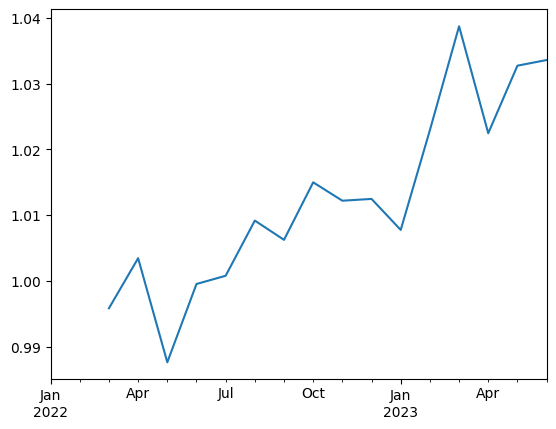

In [12]:
ew_rets = (1+returns).cumprod()
print(ew_rets[:5])
ew_rets.plot()